<a href="https://colab.research.google.com/github/luizfernando120/Projeto-teste/blob/main/C%C3%B3pia_de_Projeto_07_Abril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Numpy**
### numpy é uma biblioteca Python que fornece um objeto de matriz multidimensional,vários objetos derivados (como matrizes e matrizes mascaradas) e uma variedadede rotinas para operações rápidas em matrizes. (**CAPARROZ**, 2023)
## **Pandas**
### pandas é uma biblioteca de software livre para a linguagem de programação,Python, utilizada principalmente para manipulação e análise de dados;Ele fornece uma estrutura de dados flexível e de alto desempenho, chamada DataFrame, que é capaz de lidar com grandes conjuntos de dados e realizar operações comuns de análise de dados, como limpeza, filtragem, agrupamento, agregação, transformação e visualização. (**CAPARROZ**, 2023)
## **Matplotlib**
### é uma biblioteca abrangente para criar visualizações estáticas,animadas e interativas em Python. Um dos lemas da biblioteca Matplotlib é tornar as coisas fáceis e as coisas difíceis serem possíveis.(**CAPARROZ**, 2023)


#Importação dos dados

In [ ]:
df = pd.read_csv ('https://raw.githubusercontent.com/luizfernando120/Projeto_Governanca_TI_2023/main/obitos_publico.csv', sep = ';')

# Dados referentes aos acidentes fatais de trânsito no estado de São Paulo

In [ ]:
df

,Ano do BO (RDO),Data do Acidente,Tipo do veiculo da vitima,Tipo de vitima,Tipo de acidente,Sexo,Idade da vitima
0,2023,28/02/2023,MOTOCICLETA,CONDUTOR,NAO DISPONIVEL,MASCULINO,21
1,2023,28/02/2023,MOTOCICLETA,CONDUTOR,COLISAO,MASCULINO,55
2,2023,28/02/2023,PEDESTRE,PEDESTRE,ATROPELAMENTO,FEMININO,89
3,2023,28/02/2023,NAO DISPONIVEL,NAO DISPONIVEL,ATROPELAMENTO,FEMININO,78
4,2023,05/02/2023,CAMINHAO,NAO DISPONIVEL,COLISAO,MASCULINO,35
...,...,...,...,...,...,...,...
42826,2014,27/07/2014,AUTOMOVEL,PASSAGEIRO,COLISAO,FEMININO,42
42827,2015,01/01/2015,BICICLETA,CONDUTOR,COLISAO,MASCULINO,42
42828,2015,01/01/2015,BICICLETA,CONDUTOR,CHOQUE,MASCULINO,44
42829,2015,01/01/2015,PEDESTRE,PEDESTRE,ATROPELAMENTO,MASCULINO,66


#Ocorrências agrupadas por sexo

In [ ]:
quantidade_tipos_sexo = df['Sexo'].value_counts()

In [ ]:
quantidade_tipos_sexo

MASCULINO         34801
FEMININO           7563
NAO DISPONIVEL      467
Name: Sexo, dtype: int64

In [ ]:
quantidade_tipos_sexo.index

Index(['MASCULINO', 'FEMININO', 'NAO DISPONIVEL'], dtype='object')

In [ ]:
quantidade_tipos_sexo.values

array([34801,  7563,   467])

In [ ]:
sexos = ['MASCULINO','FEMININO','NAO DISPONIVEL']
count_sexos = [34801,7563,467]
cores_sexo = ['green','red','gray']

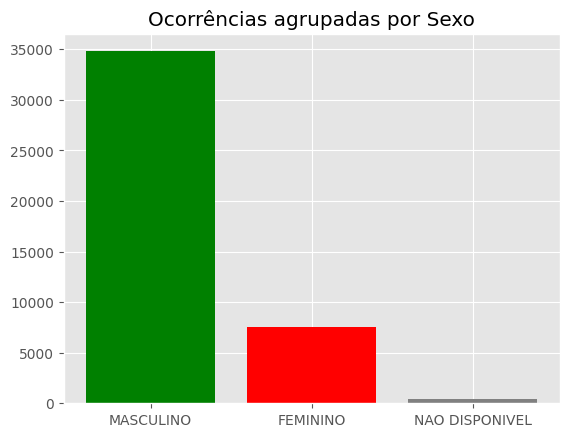

In [ ]:
grafico_sexos = plt.bar(sexos,count_sexos, align ='center', color = cores_sexo)
plt.title('Ocorrências agrupadas por Sexo')
plt.show(grafico_sexos)

Com base nas informações fornecidas, podemos concluir preliminarmente que os acidentes de trânsito são mais frequentes entre os indivíduos do sexo masculino sendo **34.801**, enquanto o gênero feminino apresenta uma proporção menor de **7.563** ocorrências. É importante ressaltar que essa análise é baseada apenas nos dados fornecidos e não leva em consideração outros fatores que podem influenciar os acidentes de trânsito.
Já não se verificou o número de **467** dos acidentes fatais, por ausência de informações, privacidade, falta de perguntas.

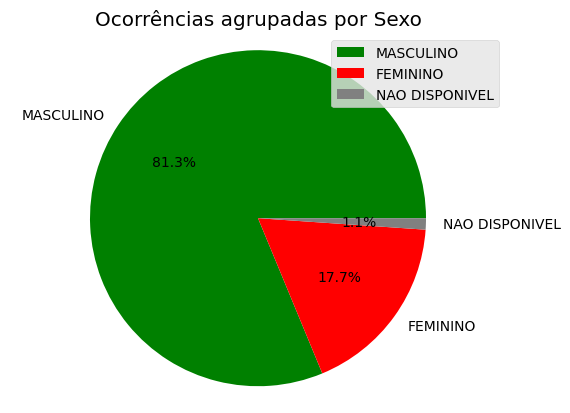

In [ ]:
pizza_sexos = plt.pie(count_sexos, labels=sexos, colors = cores_sexo, autopct = '%1.1f%%')
plt.title('Ocorrências agrupadas por Sexo')
plt.legend(['MASCULINO','FEMININO','NAO DISPONIVEL'],loc = 'upper right')
plt.axis('equal')
plt.show(pizza_sexos)

Com base no gráfico acima, podemos observar que o sexo *Masculino* está mais presente dentre os acidentes fatais, representando cerca de *81,3%* dos acidentes enquanto o sexo *Feminino* representa cerca de *17,7%*.

**Esta figura é apenas uma forma diferente de ilustrar os dados fornecidos no gráfico quantitativo dessas informações.**

#MEDIA

In [ ]:
df_agrupado_pelo_sexo_media = df.groupby('Sexo').agg({ 'Idade da vitima': np.mean }).reset_index()

In [ ]:
df_agrupado_pelo_sexo_media

,Sexo,Idade da vitima
0,FEMININO,43.937062
1,MASCULINO,40.742795
2,NAO DISPONIVEL,40.278373


 Já no quesito, Idade podemos observar no gráfico que dentre as ocorrências, a **média** de idade entre as mulheres (43,9 anos) é a maior nos acidentes fatais no estado de São Paulo.

#MEDIANA

In [ ]:
df_agrupado_pelo_sexo_mediana = df.groupby('Sexo').agg({ 'Idade da vitima': np.median }).reset_index()

In [ ]:
df_agrupado_pelo_sexo_mediana

,Sexo,Idade da vitima
0,FEMININO,41.0
1,MASCULINO,38.0
2,NAO DISPONIVEL,35.0


 Quando calculamos a **mediana** de idades, podemos observar que o resultado é semelhante a média, sendo as mulheres (41 anos) com mais idade nos acidentes fatais no estado de São Paulo.

#MODA

In [ ]:
data = pd.Series (df['Idade da vitima'])
moda = data.mode()
moda

0    21
Name: Idade da vitima, dtype: int64

Já quando nos atentamos a *moda* podemos observar que a idade com maior ocorrência de acidentes fatais nas estradas está na casa dos *21 anos*, considerada por muitos como uma idade de risco.

#DESVIO PADRAO

In [ ]:
desvio_padrao =np.std(data)
desvio_padrao

18.520739262396788

Podemos observar que o desvio padrão dos dados é de *18.52 anos*.

**Esta medida representa a dispersão dos dados em relação à *média*.**

#Ocorrências agrupadas por Tipo de Veiculo



In [ ]:
quantidade_tipos_veiculos = df['Tipo do veiculo da vitima'].value_counts()

In [ ]:
quantidade_tipos_veiculos

MOTOCICLETA       15523
AUTOMOVEL         10827
PEDESTRE           9865
BICICLETA          2807
NAO DISPONIVEL     1789
CAMINHAO           1444
ONIBUS              353
OUTROS              223
Name: Tipo do veiculo da vitima, dtype: int64

In [ ]:
quantidade_tipos_veiculos.index

Index(['MOTOCICLETA', 'AUTOMOVEL', 'PEDESTRE', 'BICICLETA', 'NAO DISPONIVEL',
       'CAMINHAO', 'ONIBUS', 'OUTROS'],
      dtype='object')

In [ ]:
quantidade_tipos_veiculos.values

array([15523, 10827,  9865,  2807,  1789,  1444,   353,   223])

In [ ]:
veiculos =['MOTOCICLETA', 'AUTOMOVEL', 'PEDESTRE', 'BICICLETA', 'NAO DISPONIVEL', 'CAMINHAO', 'ONIBUS', 'OUTROS']
quantidade = [15523, 10827,  9865,  2807,  1789,  1444,   353,   223]
cores_automoveis = ['green','orange','blue','purple','gray','pink','yellow','black']

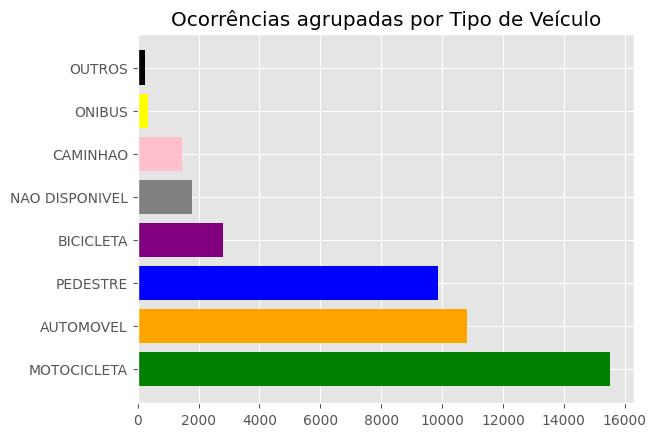

In [ ]:
grafico_automoveis = plt.barh(veiculos,quantidade, align ='center', color = cores_automoveis)
plt.title('Ocorrências agrupadas por Tipo de Veículo')
plt.show(grafico_automoveis)

Esses dados fornecem insights valiosos para entender a distribuição dos acidentes fatais por tipo de veículo envolvido.

Observamos que os acidentes fatais envolvendo motocicletas têm a maior frequência, representando o tipo de veículo com o maior número de ocorrências fatais. Isso sugere que os acidentes de motocicleta, sendo 15523, uma preocupação significativa em termos de segurança no trânsito. É necessário um foco especial em estratégias de prevenção voltadas para os usuários de motocicletas, como campanhas de conscientização, treinamento adequado e fiscalização.

Os acidentes fatais envolvendo automóveis (10827) e pedestres (9865) também possuem números expressivos. Esses dados destacam a importância de medidas de segurança para motoristas e a necessidade de melhorias na infraestrutura urbana para proteger os pedestres.

Já os acidentes fatais envolvendo bicicletas, caminhões, ônibus e outros veículos têm uma incidência menor, mas ainda assim não devem ser negligenciados.

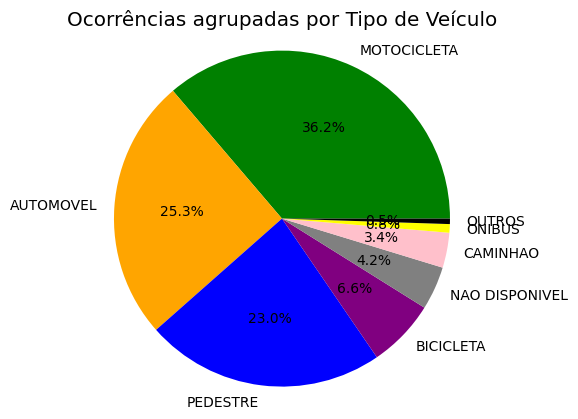

In [ ]:
pizza_veiculos = plt.pie(quantidade, labels=veiculos, colors = cores_automoveis, autopct = '%1.1f%%')
plt.title('Ocorrências agrupadas por Tipo de Veículo')
plt.axis('equal')
plt.show(pizza_veiculos)

**Distribuição Percentual dos Veículos Envolvidos:**

**Motocicleta:** Representando 36,2% das ocorrências, as motocicletas são responsáveis pela maioria dos acidentes fatais.

**Automóvel:** Com 25,3% das ocorrências, os automóveis também têm uma parcela significativa nos acidentes fatais.

**Pedestre:** Correspondendo a 23% das ocorrências, os pedestres são o terceiro grupo mais afetado.

**Bicicleta:** Com 6,55% das ocorrências, as bicicletas também contribuem para os acidentes fatais.

**Não disponível:** Com 4,18% das ocorrências sem especificação do tipo de veículo, a falta de informação dificulta a análise precisa.

**Caminhão:** Representando 3,37% das ocorrências, os acidentes envolvendo caminhões são menos frequentes.

**Ônibus:** Com 0,824% das ocorrências, os ônibus têm uma porcentagem relativamente baixa de envolvimento em acidentes fatais.

**Outros:** Correspondendo a 0,521% das ocorrências, outros tipos de veículos apresentam uma participação mínima.

#Ocorrências agrupadas por ano


In [ ]:
quantidade_anos = df['Ano do BO (RDO)'].value_counts()

In [ ]:
quantidade_anos

2015    6091
2016    5674
2017    5410
2022    5296
2019    5205
2018    5179
2020    4678
2021    4554
2023     704
2014      26
2013       8
2012       4
2011       1
2007       1
Name: Ano do BO (RDO), dtype: int64

In [ ]:
quantidade_anos.index

Int64Index([2015, 2016, 2017, 2022, 2019, 2018, 2020, 2021, 2023, 2014, 2013,
            2012, 2011, 2007],
           dtype='int64')

In [ ]:
quantidade_anos.values

array([6091, 5674, 5410, 5296, 5205, 5179, 4678, 4554,  704,   26,    8,
          4,    1,    1])

In [ ]:
anos =['2007', '2011', '2012', '2013',  '2014', '2015', '2016', '2017', '2018', '2019', '2020','2021' , '2022' , '2023' ]
numero = [ 1, 1, 4, 8, 26, 6091,  5674, 5410, 5179, 5205 ,4678 , 4554,  5296, 704]

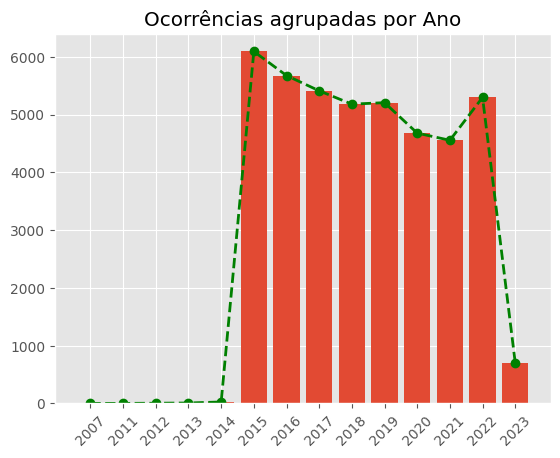

In [ ]:
grafico_anos = plt.bar(anos,numero, align ='center')
plt.plot(anos, numero, color='green', marker='o', linestyle='--', linewidth=2)
plt.title('Ocorrências agrupadas por Ano')
plt.xticks(rotation=45)
plt.show(grafico_anos)

O ano com o maior número de ocorrências registradas é 2015, com 6.091 acidentes fatais.

Os anos subsequentes, 2016 e 2017, também apresentam uma quantidade significativa de ocorrências, com 5.674 e 5.410 acidentes fatais, respectivamente.

Nota-se que houve uma queda no número de acidentes entre 2015 e 2021.

Por outro lado, os anos anteriores a 2015 apresentam números muito baixos de acidentes fatais, indicando uma possível ausência de monitoramento e registro dos acidentes fatais.

**2023 apresentam poucos acidentes, pois os dados analisados estão referentes apenas ate o mês de Fevereiro**

Essa análise agrupada por ano permite observar as tendências de ocorrências ao longo do tempo.

Podemos traçar uma linha sobre os dados para nos ajudar a analisar o crescimento e o declínio dos acidentes durante os anos


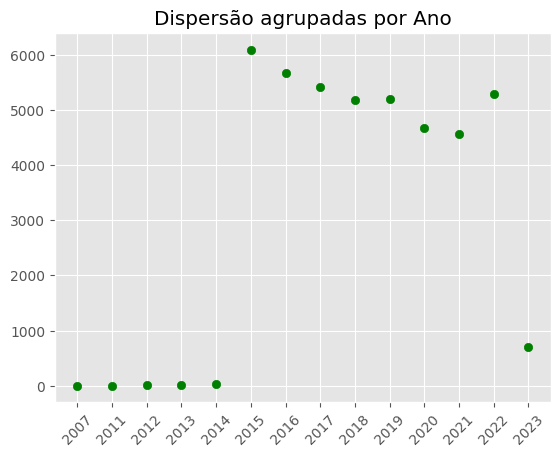

In [ ]:
dispersao_anos = plt.scatter(anos,numero, color ='green')
plt.title('Dispersão agrupadas por Ano')
plt.xticks(rotation=45)
plt.show (dispersao_anos)

A figura acima representa os dados de dispersão referentes a quantidade de acidentes no decorrer dos anos

*Uma forma diferente de visualizar os dados do gráfico "Ocorrências agrupadas por Ano"*
